In [7]:
import pandas as pd

In [8]:
df_slc = pd.read_csv('survey lung cancer.csv')

In [9]:
df_slc.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [10]:
df_slc['LUNG_CANCER'].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [11]:
df_slc['GENDER'].value_counts()

M    162
F    147
Name: GENDER, dtype: int64

In [12]:
df_slc.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


<Axes: title={'center': 'Cancer'}>

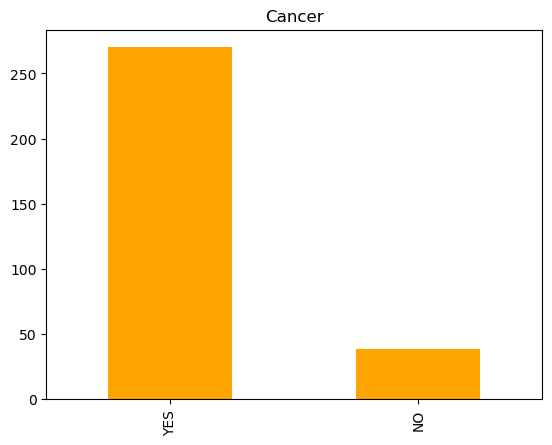

In [13]:
lung_cancer = df_slc['LUNG_CANCER'].value_counts()
lung_cancer.plot(kind='bar', color='orange', title='Cancer')

In [14]:
#grafico dinamico 
import cufflinks as cf
from IPython.display import display,HTML
cf.set_config_file(sharing='public', theme='space', offline=True)

In [15]:
lung_cancer.iplot(kind='bar', color='orange', title='Cancer')

In [16]:
df_slc.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [17]:
gender = df_slc.groupby('GENDER')

In [18]:
gender.groups.keys()

dict_keys(['F', 'M'])

In [19]:
pacient_masculine = gender.get_group('M')
pacient_female = gender.get_group('F')

In [20]:
min_age_man = pacient_masculine['AGE'].min()
max_age_man = pacient_masculine['AGE'].max()
print("Man")
print('Min: ', min_age_man)
print('Max: ', max_age_man)

Man
Min:  39
Max:  79


In [21]:
min_age_woman = pacient_female['AGE'].min()
max_age_woman = pacient_female['AGE'].max()
print("Woman")
print('Min: ', min_age_woman)
print('Max: ', max_age_woman)

Woman
Min:  21
Max:  87


### Positive of cancer

In [28]:
positive_cancer_masculine = pacient_masculine[pacient_masculine['LUNG_CANCER'] == 'YES']
print("Number of male patients positive of cancer: ", len(positive_cancer_masculine))

Number of male patients positive of cancer:  145


In [27]:
positive_cancer_female = pacient_female[pacient_female['LUNG_CANCER'] == 'YES']
print("Numberr of famel patients positive of cancer: ", len(positive_cancer_female))

Numberr of famel patients positive of cancer:  125


### Negative of cancer

In [29]:
negative_cancer_masculine = pacient_masculine[pacient_masculine['LUNG_CANCER'] == 'NO']
print("Number of male patients negative of cancer: ", len(negative_cancer_masculine))

Number of male patients negative of cancer:  17


In [30]:
negative_cancer_female = pacient_female[pacient_female['LUNG_CANCER'] == 'NO']
print("Number of male patients negative of cancer: ", len(negative_cancer_female))

Number of male patients negative of cancer:  22


<Axes: title={'center': 'Male Patients'}>

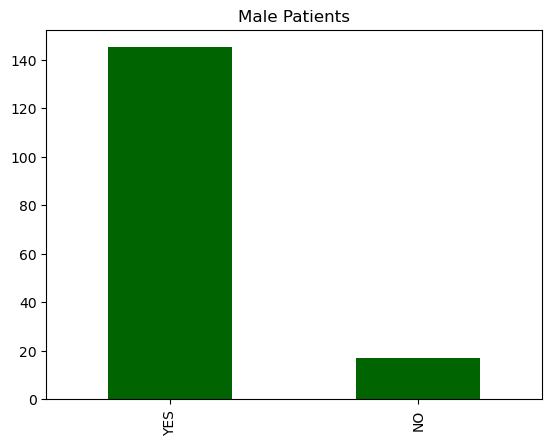

In [35]:
pacient_masculine['LUNG_CANCER'].value_counts().plot(kind='bar', title='Male Patients', color='darkgreen')

<Axes: title={'center': 'Female Patients'}>

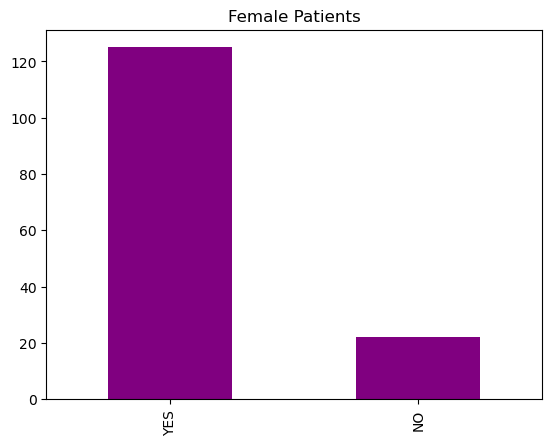

In [37]:
pacient_female['LUNG_CANCER'].value_counts().plot(kind='bar', title='Female Patients', color='purple')

In [38]:
df_slc.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [60]:
#buscamos pacientes que si fumaban y consumian alcohol que dieron positivo en cancer
pacient_masculine[((pacient_masculine['LUNG_CANCER'] == 'YES')) & ((pacient_masculine['SMOKING'] == 2) & (pacient_masculine['ALCOHOL CONSUMING'] == 2))]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES
13,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
16,M,75,2,1,1,1,2,1,2,2,2,2,2,1,2,YES
17,M,57,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,M,71,2,2,2,1,2,1,2,2,2,2,1,2,2,YES
298,M,62,2,1,2,1,1,2,1,2,2,2,2,1,2,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES


In [61]:
pacient_masculine[((pacient_masculine['LUNG_CANCER'] == 'YES')) & ((pacient_masculine['SMOKING'] == 1) & (pacient_masculine['ALCOHOL CONSUMING'] == 1))]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
36,M,60,1,2,1,1,2,1,1,2,1,2,2,1,2,YES
58,M,47,1,2,1,2,2,2,1,2,1,1,2,2,2,YES
87,M,62,1,2,2,1,1,2,1,2,1,1,1,2,2,YES
95,M,60,1,2,2,2,1,2,1,1,1,1,1,2,2,YES
98,M,64,1,2,2,2,1,2,2,1,1,2,1,2,1,YES
137,M,67,1,1,1,2,1,2,1,2,1,2,2,1,2,YES
168,M,44,1,2,1,2,2,2,1,2,1,1,2,2,2,YES
197,M,59,1,2,2,1,1,2,1,2,1,1,1,2,2,YES
205,M,62,1,2,2,2,1,2,1,1,1,1,1,2,2,YES
208,M,67,1,2,2,2,1,2,2,1,1,2,1,2,1,YES


In [59]:
#buscamos pacientes que si fumaban y consumian alcohol que dieron positivo en cancer
pacient_female[((pacient_female['LUNG_CANCER'] == 'YES')) & ((pacient_female['SMOKING'] == 2) & (pacient_female['ALCOHOL CONSUMING'] == 2))]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
26,F,61,2,2,2,1,1,2,2,1,2,1,2,2,2,YES
28,F,53,2,2,2,1,2,1,1,2,2,1,2,2,2,YES
44,F,70,2,2,1,2,2,1,1,1,2,2,1,2,1,YES
47,F,64,2,2,1,2,1,2,1,2,2,2,1,2,2,YES
52,F,54,2,1,1,2,1,2,2,2,2,2,1,2,2,YES
82,F,62,2,2,2,2,2,1,2,2,2,1,1,2,2,YES
88,F,62,2,2,2,1,2,1,2,1,2,1,1,1,1,YES
89,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
96,F,61,2,2,2,1,1,1,2,1,2,2,2,1,2,YES
107,F,60,2,2,2,2,2,1,2,2,2,1,1,2,2,YES


In [62]:
pacient_female[((pacient_female['LUNG_CANCER'] == 'YES')) & ((pacient_female['SMOKING'] == 1) & (pacient_female['ALCOHOL CONSUMING'] == 1))]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
15,F,48,1,2,2,2,2,2,2,2,1,2,2,2,1,YES
21,F,64,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
56,F,63,1,2,1,2,1,2,1,1,1,2,2,1,2,YES
66,F,56,1,2,1,1,2,2,2,2,1,2,2,1,2,YES
76,F,76,1,2,2,2,2,2,2,2,1,2,2,2,2,YES
91,F,71,1,1,1,1,2,2,2,1,1,2,2,1,2,YES
101,F,81,1,2,2,2,2,2,2,2,1,2,2,2,2,YES
105,F,60,1,1,1,1,2,2,1,1,1,1,2,1,1,YES
112,F,68,1,1,1,2,1,2,1,2,1,2,2,1,2,YES
